In [1]:
from dask.distributed import Client, progress

from dask_kubernetes import KubeCluster
cluster = KubeCluster(n_workers=20)
cluster

distributed.scheduler - INFO - Clear task state
distributed.scheduler - INFO -   Scheduler at:  tcp://10.32.16.184:46097
distributed.scheduler - INFO -   dashboard at:                     :8787


In [2]:
import sys, glob
import numpy as np
import xarray as xr
import time
import zarr
import matplotlib.pyplot as plt


In [3]:
import gcsfs
fs = gcsfs.GCSFileSystem('pangeo-181919', requester_pays=True)


In [4]:
zmap = fs.get_mapper('pangeo-meom/eNATL60-I/eNATL60-mesh-mask')
ds = xr.open_zarr(zmap)
print(str(np.around(ds.nbytes/1e9))+ ' GB of data')
ds
            

distributed.scheduler - INFO - Register tcp://10.32.35.6:41101
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.35.6:41101
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.32.5.4:45045
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.5.4:45045
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.32.35.5:35539
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.35.5:35539
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.32.17.4:43741
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.17.4:43741
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.32.17.5:41573
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.17.5:41573
distributed.core - INFO -

621.0 GB of data


<xarray.Dataset>
Dimensions:       (t: 1, x: 8354, y: 4729, z: 300)
Dimensions without coordinates: t, x, y, z
Data variables:
    e1f           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e1t           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e1u           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e1v           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e2f           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e2t           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e2u           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e2v           (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    e3t_0         (t, z, y, x) float64 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    e3t_1d        (t, z) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    e3u_0         (t, z, y, x) float64 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    e3v_0         (t, z, y, x) float64 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    e3w_0         (t, z, y, x) float64 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    e3w_1d        (t, z) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    ff            (t, y, x) float64 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    fmask         (t, z, y, x) int8 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    fmaskutil     (t, y, x) int8 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gdept_0       (t, z, y, x) float32 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    gdept_1d      (t, z) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    gdepu         (t, z, y, x) float32 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    gdepv         (t, z, y, x) float32 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    gdepw_0       (t, z, y, x) float32 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    gdepw_1d      (t, z) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
    glamf         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    glamt         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    glamu         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    glamv         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gphif         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gphit         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gphiu         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    gphiv         (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    isfdraft      (t, y, x) float32 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    mbathy        (t, y, x) int16 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    misf          (t, y, x) int16 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    nav_lat       (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    nav_lev       (z) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    nav_lon       (y, x) float32 dask.array<chunksize=(4729, 8354), meta=np.ndarray>
    time_counter  (t) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    tmask         (t, z, y, x) int8 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    tmaskutil     (t, y, x) int8 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    umask         (t, z, y, x) int8 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    umaskutil     (t, y, x) int8 dask.array<chunksize=(1, 4729, 8354), meta=np.ndarray>
    vmask         (t, z, y, x) int8 dask.array<chunksize=(1, 1, 4729, 8354), meta=np.ndarray>
    vma

distributed.scheduler - INFO - Register tcp://10.32.7.5:33607
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.7.5:33607
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.32.7.6:42601
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.7.6:42601
distributed.core - INFO - Starting established connection


distributed.core - INFO - Event loop was unresponsive in Scheduler for 13.85s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Scheduler for 14.49s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


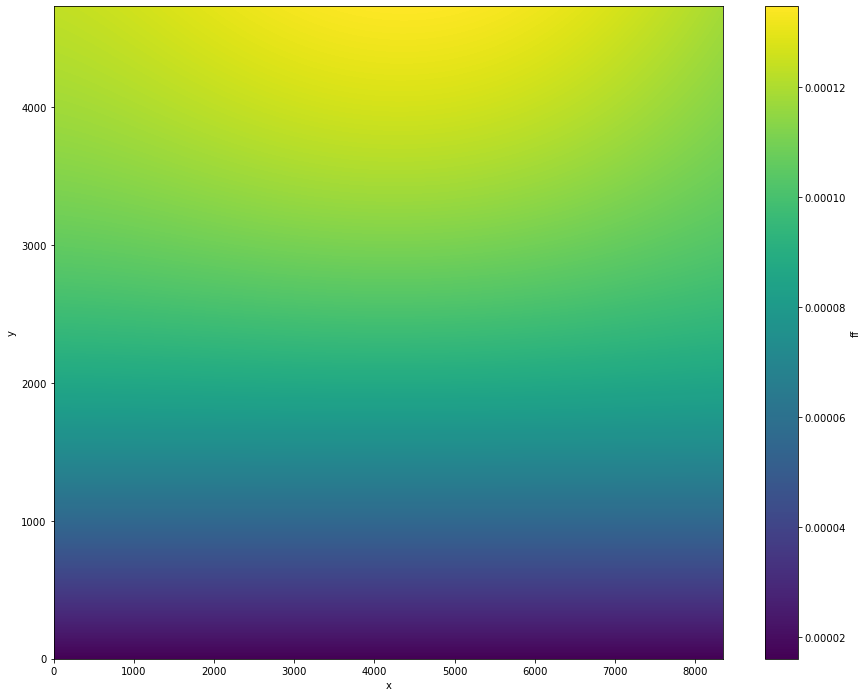

distributed.scheduler - INFO - Register tcp://10.32.8.2:34945
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.8.2:34945
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.32.8.3:41583
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.8.3:41583
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.32.9.3:37897
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.9.3:37897
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.32.9.2:42571
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.9.2:42571
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.32.7.3:38055
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.7.3:38055
distributed.core - INFO - Startin

In [7]:
fig=plt.figure(figsize=(15,12))
ds['ff'][0].plot()


distributed.core - INFO - Event loop was unresponsive in Scheduler for 13.81s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Scheduler for 13.60s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


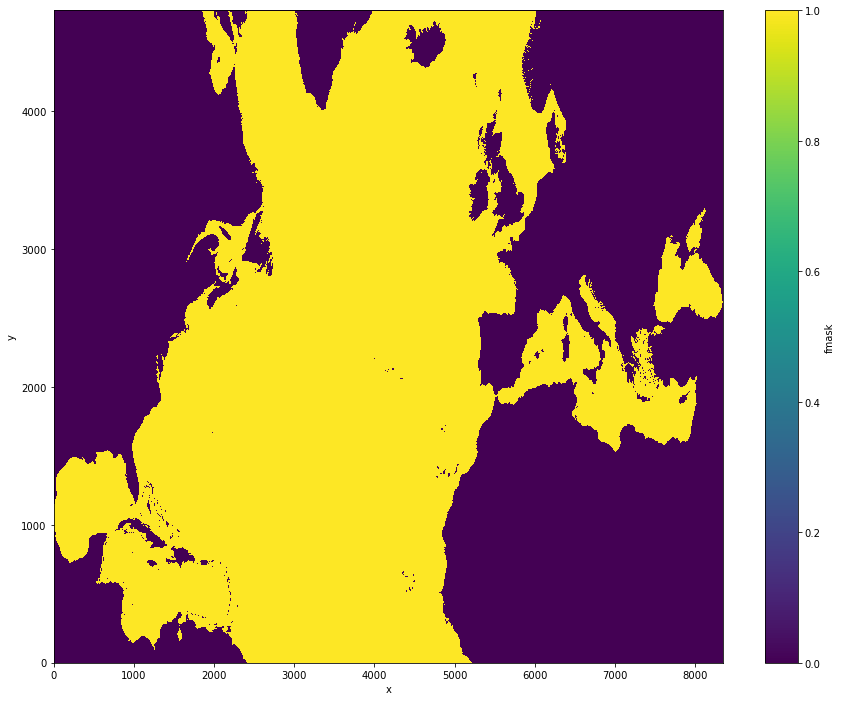

In [5]:
fig=plt.figure(figsize=(15,12))
ds['fmask'][0,0].plot()


distributed.core - INFO - Event loop was unresponsive in Scheduler for 14.23s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
distributed.core - INFO - Event loop was unresponsive in Scheduler for 14.03s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


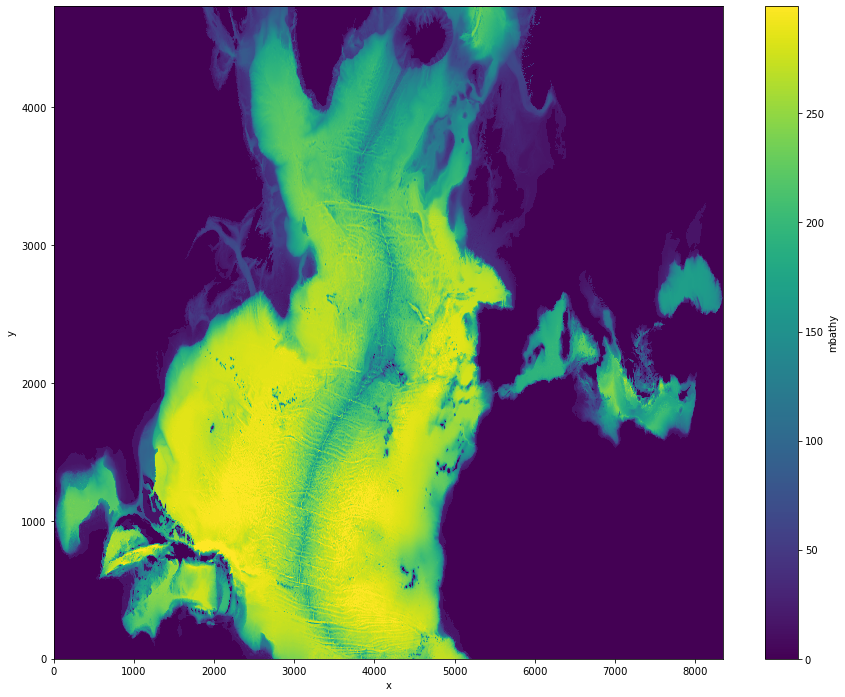

distributed.scheduler - INFO - Register tcp://10.32.10.2:36725
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.10.2:36725
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.32.10.3:46673
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.32.10.3:46673
distributed.core - INFO - Starting established connection


In [6]:
fig=plt.figure(figsize=(15,12))
ds['mbathy'][0].plot()

In [ ]:
cluster.close()